In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
FI_SGGE_matrix = pd.read_csv('FI_SGGE_across_iterations.csv', index_col=0, delimiter=';')
FI_SGGE_matrix = FI_SGGE_matrix.T
FI_SGGE_matrix

FI,RF_SGGE_msi,XGB_SGGE_msi
Unnamed: 1,PTMAP5,PTMAP5
Unnamed: 2,MSH4,MSH4
Unnamed: 3,BOLA3P3,MMP20
Unnamed: 4,TAAR3,TMEM215
Unnamed: 5,TNNC2,SLC13A2
...,...,...
Unnamed: 396,LINC01168,GALNT14
Unnamed: 397,ELOVL3,FAM90A24P
Unnamed: 398,AC000374.1,AC019330.1
Unnamed: 399,REN,TMEM252


In [106]:
# Melt the DataFrame to have a single column of microbe names
melted_df = FI_SGGE_matrix.melt(value_name='gene', var_name='model')

# Count occurrences of each microbe
gene_counts = melted_df['gene'].value_counts()

# Filter out microbes that occur only once
filtered_gene_counts = gene_counts[gene_counts >= 20*2]

# Convert the filtered counts to a DataFrame for better readability
ranked_genes = filtered_gene_counts.reset_index()
ranked_genes.columns = ['gene', 'frequency']

# Sort the DataFrame by frequency in descending order
ranked_genes = ranked_genes.sort_values(by='frequency', ascending=False)

# Initialize a new DataFrame with microbe names as index and model names as columns
ranked_microbe_list = ranked_genes['gene']
result_df = pd.DataFrame(index=ranked_microbe_list, columns=FI_SGGE_matrix.columns)

# Fill the DataFrame with frequencies
for model in FI_SGGE_matrix.columns:
    model_genes = FI_SGGE_matrix[model]
    for rank, gene in enumerate(model_genes):
        if gene in result_df.index:
            result_df.loc[gene, model] = filtered_gene_counts[gene]

# Fill NaN values with None
result_df = result_df.where(pd.notnull(result_df), None)

# Print the resulting DataFrame
result_df

FI,RF_SGGE_msi,XGB_SGGE_msi
gene,,
PTMAP5,40,40
MSH4,40,40


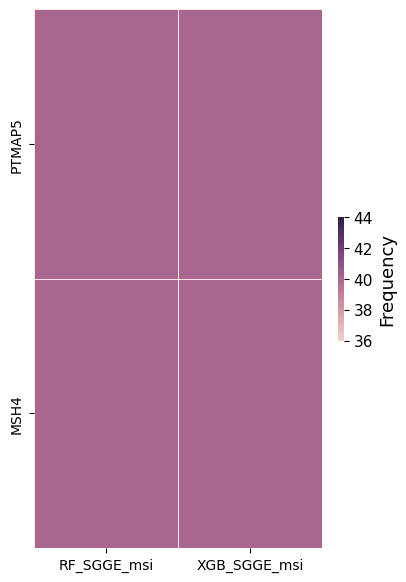

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')
#result_df.fillna(0, inplace=True)  # Replace NaN with 0 for scaling

# Apply Min-Max Scaling and invert the result
#scaler = MinMaxScaler()
#scaled_df = scaler.fit_transform(result_df)

# Convert to DataFrame
#normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)


# Fill NaN values with 0 if necessary
#normalized_df = normalized_df.fillna(0)

# Create a heatmap with broader lines between cells
plt.figure(figsize=(4, 7))
cmap = sns.cubehelix_palette(as_cmap=True)
heatmap = sns.heatmap(result_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Frequency', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')
# Adjust the color bar label size
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Frequency', fontsize=13)  # Change 'fontsize' to your desired size

# Optionally adjust the tick label size if needed
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate the x-axis labels for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the heatmap
plt.show()

In [ ]:
# Labelled by mean feature importance

In [85]:
FI_matrix = pd.read_csv('FI_across_iterations.csv', index_col=0, delimiter=';')
FI_matrix = FI_matrix.T
FI_matrix.index = FI_matrix.index.astype(float).astype(int)
FI_matrix

FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_SG_BRAF,XGB_SG_BRAF,RF_SG_TP53,XGB_SG_TP53,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
1,g_Peptoniphilus,g_Serratia,g_Cloacibacillus,g_Cloacibacillus,g_Turicimonas,g_Aurantimicrobium,g_Fusobacterium,g_Hungatella,g_Clostridioides,g_Roseateles,g_Dorea,g_Kangiella,g_Atopobium,g_Spirochaeta,g_Parvimonas,g_Psychroflexus,g_Cosenzaea,g_Cosenzaea
2,g_Achromobacter,g_Caproiciproducens,g_Anaerotignum,g_Piscinibacter,g_Akkermansia,g_Petrimonas,g_Pseudoprevotella,g_Ramlibacter,g_Tyzzerella,g_Alistipes,g_Parabacteroides,g_Marinospirillum,g_Lactobacillus,g_Duganella,g_Peptostreptococcus,g_Gangjinia,g_Desulfoconvexum,g_Zooshikella
3,g_Proteus,g_Kineothrix,g_Odoribacter,g_Taurinivorans,g_Butyrivibrio,g_Vibrio,g_Emergencia,g_Fusobacterium,g_Selenomonas,g_Candidatus Epulonipiscium,g_Faecalibacterium,g_Parabacteroides,g_Peptostreptococcus,g_Soonwooa,g_Anaerofustis,g_Salinirepens,g_Orbus,g_Saccharibacillus
4,g_Rhodoluna,g_Peptoniphilus,g_Chakrabartyella,g_Aeromonas,g_Selenomonas,g_Akkermansia,g_Thomasclavelia,g_Pusillibacter,g_Roseburia,g_Aurantimicrobium,g_Solobacterium,g_Dorea,g_Zhizhongheella,g_Ottowia,g_Bifidobacterium,g_Tepidibacillus,g_Dolosicoccus,g_Yimella
5,g_Salmonella,g_Ideonella,g_Aeromonas,g_Pusillibacter,g_Peptoniphilus,g_Segatella,g_Aristaeella,g_Coprobacter,g_Leptotrichia,g_Rhodoluna,g_Agrobacterium,g_Tepidiphilus,g_Mogibacterium,g_Catabacter,g_Phascolarctobacterium,g_Kiloniella,g_Dermatophilus,g_Luteococcus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,g_Butyricimonas,g_Roseateles,g_Faecalibaculum,g_Faecalibaculum,g_Ruthenibacterium,g_Taurinivorans,g_Ramlibacter,g_Vescimonas,g_Clostridioides,g_Shewanella,g_Lachnoclostridium,g_Pseudohaliea,g_Chelonobacter,g_Solobacterium,g_Dialister,g_Microbulbifer,g_Aeromonas,g_Wohlfahrtiimonas
17,g_Ideonella,g_Lachnoanaerobaculum,g_Turicimonas,g_Vescimonas,g_Anaerocolumna,g_Mogibacterium,g_Hymenobacter,g_Alicycliphilus,g_Turicimonas,g_Porphyromonas,g_Intestinimonas,g_Alkanindiges,g_Fusobacterium,g_Thioalkalimicrobium,g_Lactovum,g_Yuhushiella,g_Paraprevotella,g_Mahella
18,g_Clostridioides,g_Kineothrix,g_Porphyromonas,g_Oscillibacter,g_Blautia,g_Vogesella,g_Tyzzerella,g_Paraprevotella,g_Tyzzerella,g_Ligilactobacillus,g_Gallibacterium,g_Desulfovermiculus,g_Sporomusa,g_Atopobium,g_Geofilum,g_Parvimonas,g_Lautropia,g_Pelosinus
19,g_Clostridium,g_Prevotella,g_Lachnospira,g_Subdoligranulum,g_Sutterella,g_Porphyromonas,g_Lawsonia,g_Gottschalkia,g_Dialister,g_Clostridioides,g_Acidithiobacillus,g_Psychroserpens,g_Leeuwenhoekiella,g_Suttonella,g_Lachnoanaerobaculum,g_Brenneria,g_Holdemanella,g_Phocoenobacter


In [86]:
# Rank microbes based on frequency of presence and label them with mean feature importance from each model

melted_df = FI_matrix.reset_index().melt(id_vars='index', value_name='microbe', var_name='model')

# Calculate the mean index (feature importance) for each microbe in each model
microbe_mean_indices = melted_df.groupby(['microbe', 'model'])['index'].mean().reset_index()

microbe_counts = melted_df['microbe'].value_counts()
filtered_microbes = microbe_counts[microbe_counts >= 20*2].index

# Filter the mean indices dataframe to keep only the relevant microbes
filtered_microbe_mean_indices = microbe_mean_indices[microbe_mean_indices['microbe'].isin(filtered_microbes)]

result_df = filtered_microbe_mean_indices.pivot(index='microbe', columns='model', values='index')
result_df = result_df.reindex(columns=FI_matrix.columns)

# Sort the rows by the frequency of the microbes
sorted_microbes = microbe_counts.loc[filtered_microbes].sort_values(ascending=False).index
result_df = result_df.loc[sorted_microbes]

result_df = result_df.where(pd.notnull(result_df), None)

result_df


FI,RF_SG_msi,XGB_SG_msi,RF_SG_stage,XGB_SG_stage,RF_SG_TL,XGB_SG_TL,RF_SG_BRAF,XGB_SG_BRAF,RF_SG_TP53,XGB_SG_TP53,RF_TCGA_ST,XGB_TCGA_ST,RF_FMG_HC,XGB_FMG_HC,RF_FMG_stage,XGB_FMG_stage,RF_FMG_TL,XGB_FMG_TL
microbe,,,,,,,,,,,,,,,,,,
g_Cloacibacillus,NaN,NaN,1.050000,4.350000,11.846154,11.636364,14.142857,NaN,14.333333,NaN,NaN,NaN,NaN,NaN,11.50,NaN,8.437500,9.5
g_Selenomonas,9.150000,12.800000,NaN,16.500000,3.700000,13.714286,NaN,NaN,5.764706,8.500000,NaN,NaN,11.545455,16.500000,NaN,NaN,NaN,NaN
g_Fusobacterium,15.666667,7.000000,NaN,12.000000,NaN,19.000000,2.750000,8.750000,6.150000,14.250000,NaN,NaN,9.812500,NaN,NaN,NaN,NaN,NaN
g_Pusillibacter,17.000000,NaN,9.500000,9.100000,14.571429,NaN,10.421053,8.583333,8.166667,14.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g_Roseburia,18.000000,7.500000,NaN,NaN,13.666667,12.000000,NaN,16.000000,7.444444,13.833333,6.10,6.611111,NaN,18.000000,NaN,NaN,NaN,NaN
g_Faecalibacterium,NaN,17.000000,NaN,10.000000,NaN,8.750000,NaN,NaN,8.000000,8.600000,1.35,10.950000,18.666667,NaN,NaN,NaN,7.250000,NaN
g_Tyzzerella,NaN,8.000000,16.000000,13.333333,8.823529,15.000000,11.157895,12.083333,10.333333,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g_Bacteroides,NaN,4.000000,13.777778,7.333333,11.500000,7.466667,15.400000,13.500000,15.000000,10.000000,11.70,16.833333,NaN,NaN,NaN,NaN,NaN,NaN
g_Peptostreptococcus,NaN,NaN,10.400000,17.666667,NaN,NaN,NaN,13.000000,18.000000,7.333333,NaN,NaN,1.450000,8.909091,2.10,13.500000,NaN,NaN


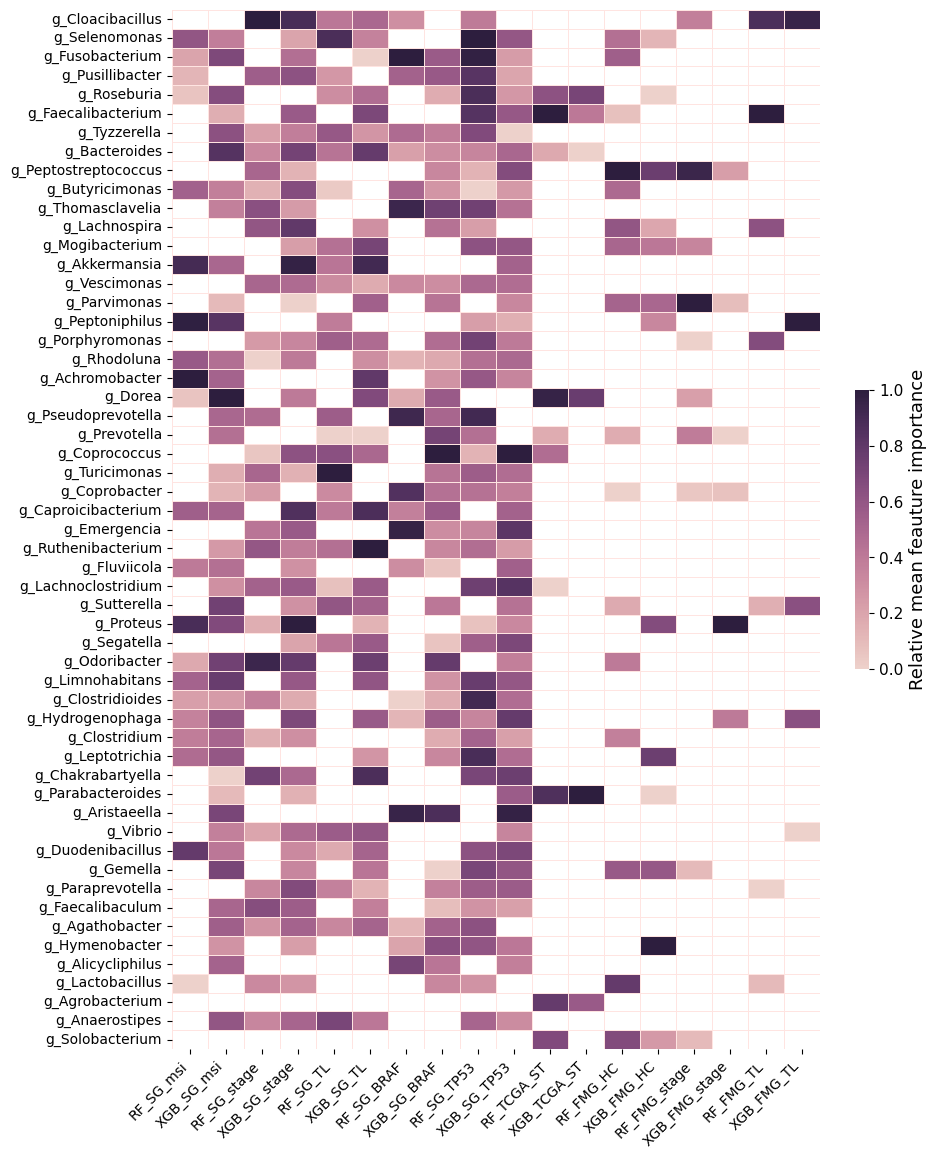

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Convert all values to numeric and handle NaN
result_df = result_df.apply(pd.to_numeric, errors='coerce')

# Scaling
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(- result_df)
normalized_df = pd.DataFrame(scaled_df, index=result_df.index, columns=result_df.columns)

plt.figure(figsize=(9, 13.5))
cmap = sns.cubehelix_palette(as_cmap=True)

heatmap = sns.heatmap(normalized_df, annot=False, cmap=cmap, 
                      cbar_kws={'label': 'Relative mean feauture importance', 'fraction': 0.02, 'pad': 0.05},
                      linewidths=0.5, linecolor='mistyrose')

colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Relative mean feauture importance', fontsize=13)  
colorbar.ax.tick_params(labelsize=11)

plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [88]:
print(result_df.T.columns)

Index(['g_Cloacibacillus', 'g_Selenomonas', 'g_Fusobacterium',
       'g_Pusillibacter', 'g_Roseburia', 'g_Faecalibacterium', 'g_Tyzzerella',
       'g_Bacteroides', 'g_Peptostreptococcus', 'g_Butyricimonas',
       'g_Thomasclavelia', 'g_Lachnospira', 'g_Mogibacterium', 'g_Akkermansia',
       'g_Vescimonas', 'g_Parvimonas', 'g_Peptoniphilus', 'g_Porphyromonas',
       'g_Rhodoluna', 'g_Achromobacter', 'g_Dorea', 'g_Pseudoprevotella',
       'g_Prevotella', 'g_Coprococcus', 'g_Turicimonas', 'g_Coprobacter',
       'g_Caproicibacterium', 'g_Emergencia', 'g_Ruthenibacterium',
       'g_Fluviicola', 'g_Lachnoclostridium', 'g_Sutterella', 'g_Proteus',
       'g_Segatella', 'g_Odoribacter', 'g_Limnohabitans', 'g_Clostridioides',
       'g_Hydrogenophaga', 'g_Clostridium', 'g_Leptotrichia',
       'g_Chakrabartyella', 'g_Parabacteroides', 'g_Aristaeella', 'g_Vibrio',
       'g_Duodenibacillus', 'g_Gemella', 'g_Paraprevotella',
       'g_Faecalibaculum', 'g_Agathobacter', 'g_Hymenobacter',
 

In [89]:
normalized_df.columns

Index(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'],
      dtype='object', name='FI')

Extract clinical characteristic-specific genera:

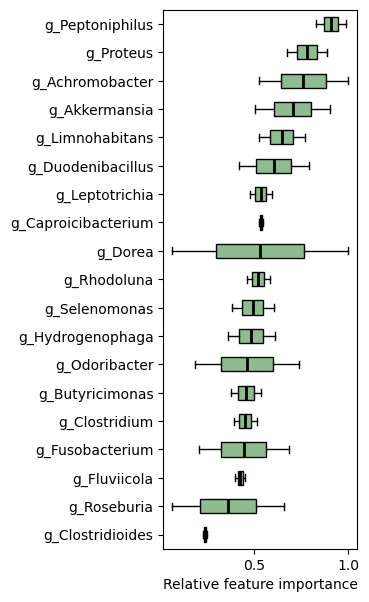

In [90]:
SG_msi_df = normalized_df.drop(['RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_msi_df = SG_msi_df.dropna()
SG_msi_df['SG_msi'] = SG_msi_df.median(axis=1)

SG_msi_df = SG_msi_df.sort_values(by='SG_msi', ascending=False)
SG_msi_df = SG_msi_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_msi_df, vert=False, patch_artist=True,
            labels=SG_msi_df.columns, 
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

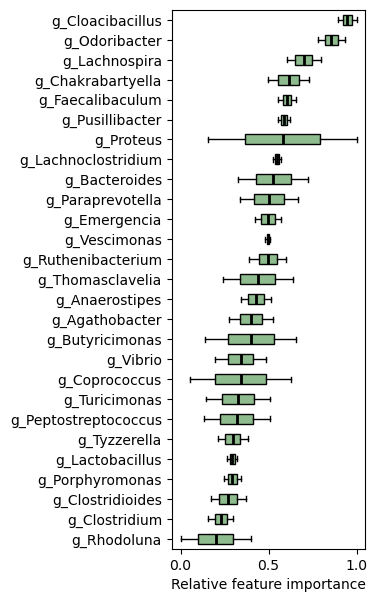

In [91]:
SG_stage_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_stage_df = SG_stage_df.dropna()
SG_stage_df['SG_stage'] = SG_stage_df.median(axis=1)

SG_stage_df = SG_stage_df.sort_values(by='SG_stage', ascending=False)
SG_stage_df = SG_stage_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_stage_df, vert=False, patch_artist=True,
            labels=SG_stage_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2})

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

In [92]:
print(SG_stage_df.columns)

Index(['g_Cloacibacillus', 'g_Odoribacter', 'g_Lachnospira',
       'g_Chakrabartyella', 'g_Faecalibaculum', 'g_Pusillibacter', 'g_Proteus',
       'g_Lachnoclostridium', 'g_Bacteroides', 'g_Paraprevotella',
       'g_Emergencia', 'g_Vescimonas', 'g_Ruthenibacterium',
       'g_Thomasclavelia', 'g_Anaerostipes', 'g_Agathobacter',
       'g_Butyricimonas', 'g_Vibrio', 'g_Coprococcus', 'g_Turicimonas',
       'g_Peptostreptococcus', 'g_Tyzzerella', 'g_Lactobacillus',
       'g_Porphyromonas', 'g_Clostridioides', 'g_Clostridium', 'g_Rhodoluna'],
      dtype='object', name='microbe')


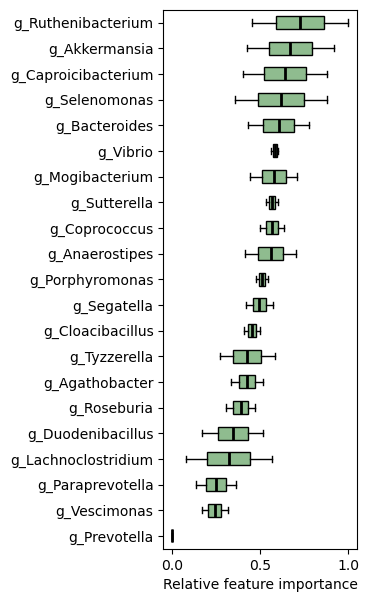

In [93]:
SG_TL_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_TL_df = SG_TL_df.dropna()
SG_TL_df['SG_TL'] = SG_TL_df.median(axis=1)

SG_TL_df = SG_TL_df.sort_values(by='SG_TL', ascending=False)
SG_TL_df = SG_TL_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_TL_df, vert=False, patch_artist=True,
            labels=SG_TL_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

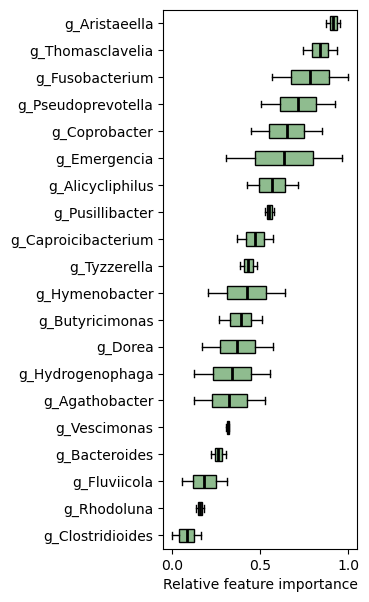

In [94]:
SG_BRAF_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL', 'XGB_SG_TL',
                                'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_BRAF_df = SG_BRAF_df.dropna()
SG_BRAF_df['SG_BRAF'] = SG_BRAF_df.median(axis=1)

SG_BRAF_df = SG_BRAF_df.sort_values(by='SG_BRAF', ascending=False)
SG_BRAF_df = SG_BRAF_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_BRAF_df, vert=False, patch_artist=True,
            labels=SG_BRAF_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2})

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

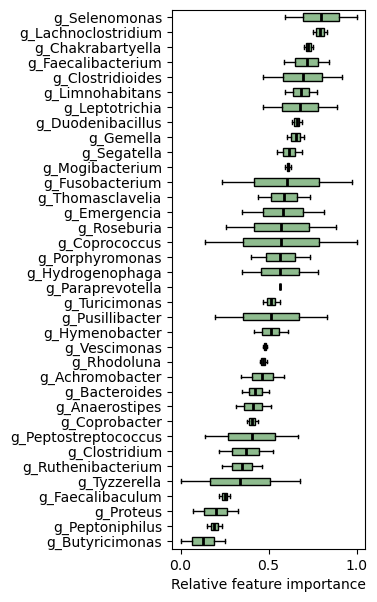

In [95]:
SG_TP53_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL', 'XGB_SG_TL',
                                  'RF_SG_BRAF', 'XGB_SG_BRAF',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
SG_TP53_df = SG_TP53_df.dropna()
SG_TP53_df['SG_TP53'] = SG_TP53_df.median(axis=1)

SG_TP53_df = SG_TP53_df.sort_values(by='SG_TP53', ascending=False)
SG_TP53_df = SG_TP53_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(SG_TP53_df, vert=False, patch_artist=True,
            labels=SG_TP53_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

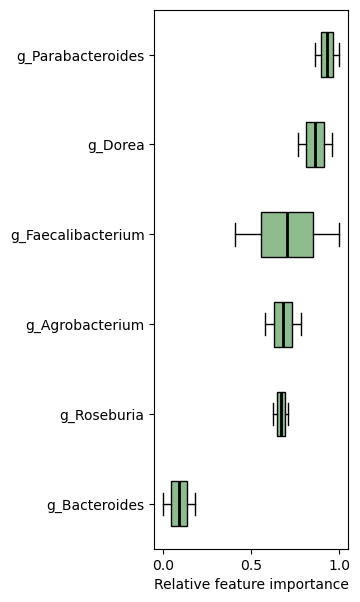

In [96]:
TCGA_ST_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
        'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
TCGA_ST_df = TCGA_ST_df.dropna()
TCGA_ST_df['TCGA_ST'] = TCGA_ST_df.median(axis=1)

TCGA_ST_df = TCGA_ST_df.sort_values(by='TCGA_ST', ascending=False)
TCGA_ST_df = TCGA_ST_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(TCGA_ST_df, vert=False, patch_artist=True,
            labels=TCGA_ST_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

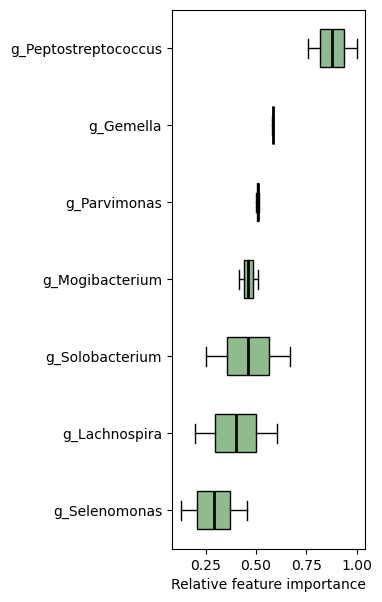

In [97]:
FMG_HC_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST','RF_FMG_stage',
       'XGB_FMG_stage', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
FMG_HC_df = FMG_HC_df.dropna()
FMG_HC_df['FMG_HC'] = FMG_HC_df.median(axis=1)

FMG_HC_df = FMG_HC_df.sort_values(by='FMG_HC', ascending=False)
FMG_HC_df = FMG_HC_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_HC_df, vert=False, patch_artist=True,
            labels=FMG_HC_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

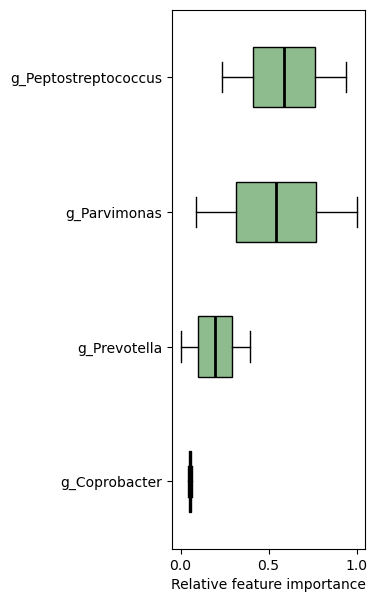

In [98]:
FMG_stage_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_TL', 'XGB_FMG_TL'], axis = 1)
FMG_stage_df = FMG_stage_df.dropna()
FMG_stage_df['FMG_stage'] = FMG_stage_df.median(axis=1)

FMG_stage_df = FMG_stage_df.sort_values(by='FMG_stage', ascending=False)
FMG_stage_df = FMG_stage_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_stage_df, vert=False, patch_artist=True,
            labels=FMG_stage_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()

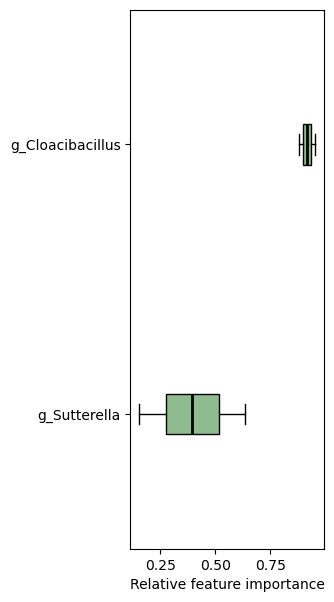

In [99]:
FMG_TL_df = normalized_df.drop(['RF_SG_msi', 'XGB_SG_msi', 'RF_SG_stage', 'XGB_SG_stage', 'RF_SG_TL',
       'XGB_SG_TL', 'RF_SG_BRAF', 'XGB_SG_BRAF', 'RF_SG_TP53', 'XGB_SG_TP53',
       'RF_TCGA_ST', 'XGB_TCGA_ST', 'RF_FMG_HC', 'XGB_FMG_HC', 'RF_FMG_stage',
       'XGB_FMG_stage'], axis = 1)
FMG_TL_df = FMG_TL_df.dropna()
FMG_TL_df['FMG_TL'] = FMG_TL_df.median(axis=1)

FMG_TL_df = FMG_TL_df.sort_values(by='FMG_TL', ascending=False)
FMG_TL_df = FMG_TL_df.T

plt.figure(figsize=(2.5, 7))
plt.boxplot(FMG_TL_df, vert=False, patch_artist=True,
            labels=FMG_TL_df.columns,
            boxprops={'facecolor': 'darkseagreen', 'color': 'black'},
            medianprops={'color': 'black', 'linewidth': 2}) 

plt.xlabel('Relative feature importance')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()